# CapStone - Clothing Recommendation & Classifier System

## Package Installation and Imports

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from google.colab import files

In [70]:
metadata_path = '/content/drive/MyDrive/Colab Notebooks/CapStone/ClothingData/clothing_metadata.csv'
metadata = pd.read_csv(metadata_path)
metadata.head()

,filename,category,size,color,material
0,halad1.png,Халад,"L, XL, XXL",Тод Ягаан,"Үслэг, зузаан"
1,halad2.png,Халад,"L, XL, XXL",Усан Ягаан,"Үслэг, зузаан"
2,halad3.png,Халад,"L, XL, XXL",Нил Ягаан,Хөвөн даавуу
3,halad4.png,Халад,"XL, XXL",Тод Ягаан,Хөвөн даавуу
4,halad5.png,Халад,"XL, XXL",Ягаан,Муслим


In [71]:
image_folder = '/content/drive/MyDrive/Colab Notebooks/CapStone/data'

def is_valid_image(path):
    try:
        with Image.open(path) as img:
            img.verify()
        return True
    except:
        return False

valid_image_paths = []

for folder in os.listdir(image_folder):
    folder_path = os.path.join(image_folder, folder)
    if not os.path.isdir(folder_path):
        continue
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        if is_valid_image(file_path):
            valid_image_paths.append(file_path)
        else:
            print(f"❌ Invalid image: {file_path}")

print(f"✅ Total valid images: {len(valid_image_paths)}")

✅ Total valid images: 23


In [72]:
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

def extract_features(img_path):
    try:
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        features = model.predict(x)
        return features[0]
    except Exception as e:
        print(f"⚠️ Skipping {img_path}: {e}")
        return None

In [73]:
features_list = []
valid_filenames = []

for img_path in valid_image_paths:
    features = extract_features(img_path)
    if features is not None:
        features_list.append(features)
        valid_filenames.append(os.path.basename(img_path))

features_array = np.array(features_list)
print("✅ Features array shape:", features_array.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
✅ Features array shape: (23, 2048)


In [74]:
def get_metadata_for_image(filename):
    row = metadata[metadata['filename'] == filename]
    if row.empty:
        return "Unknown", "Unknown", "Unknown", "Unknown"
    row = row.iloc[0]
    return row['category'], row['size'], row['color'], row['material']

Saving halad4.png to halad4.png

📤 Uploaded: halad4.png


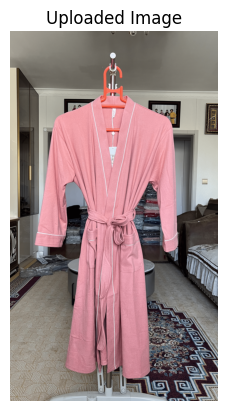

🧾 Filename: halad4.png
👗 Category: Халад
📏 Size: XL, XXL
🎨 Color: Тод Ягаан
🧵 Material: Хөвөн даавуу
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step

🔍 Top Similar Products:

📄 File: halad4.png
👗 Category: Халад
📏 Size: XL, XXL
🎨 Color: Тод Ягаан
🧵 Material: Хөвөн даавуу
----------------------------------------


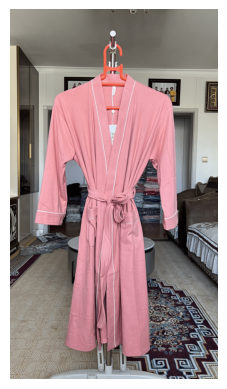

📄 File: halad3.png
👗 Category: Халад
📏 Size: L, XL, XXL
🎨 Color: Нил Ягаан 
🧵 Material: Хөвөн даавуу
----------------------------------------


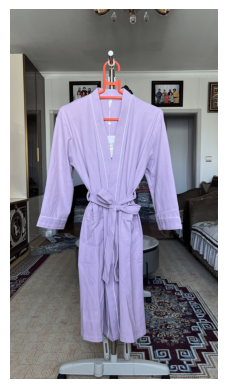

📄 File: halad2.png
👗 Category: Халад
📏 Size: L, XL, XXL
🎨 Color: Усан Ягаан
🧵 Material: Үслэг, зузаан
----------------------------------------


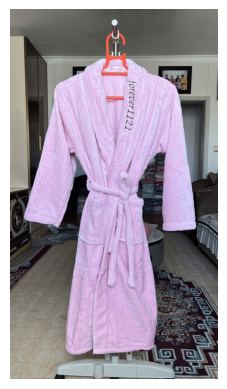

📄 File: halad7.png
👗 Category: Халад
📏 Size: M, L, XXL
🎨 Color: Ягаан
🧵 Material: Муслим
----------------------------------------


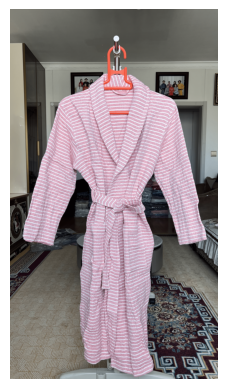

📄 File: halad11.png
👗 Category: Халад
📏 Size: M, L, XL
🎨 Color: Ногоон
🧵 Material: Тааран
----------------------------------------


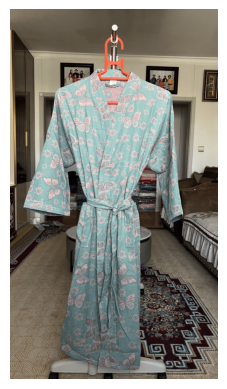

In [75]:
uploaded = files.upload()

for uploaded_file in uploaded.keys():
    filename = uploaded_file
    print(f"\n📤 Uploaded: {filename}")

    # Validate
    try:
        img = Image.open(filename)
        img.verify()
        img = Image.open(filename).convert("RGB")
    except Exception as e:
        print(f"❌ Not a valid image: {e}")
        continue

    # Display uploaded image
    plt.imshow(img)
    plt.axis('off')
    plt.title("Uploaded Image")
    plt.show()

    # Metadata
    category, size, color, material = get_metadata_for_image(filename)
    print(f"🧾 Filename: {filename}")
    print(f"👗 Category: {category}")
    print(f"📏 Size: {size}")
    print(f"🎨 Color: {color}")
    print(f"🧵 Material: {material}")

    # Feature extraction for uploaded image
    query_feat = extract_features(filename)
    if query_feat is None:
        continue

    # Similarity computation
    sims = cosine_similarity([query_feat], features_array)[0]
    top_indices = sims.argsort()[-5:][::-1]

    print("\n🔍 Top Similar Products:\n")
    for idx in top_indices:
        sim_file = valid_filenames[idx]
        sim_category, sim_size, sim_color, sim_material = get_metadata_for_image(sim_file)

        print(f"📄 File: {sim_file}")
        print(f"👗 Category: {sim_category}")
        print(f"📏 Size: {sim_size}")
        print(f"🎨 Color: {sim_color}")
        print(f"🧵 Material: {sim_material}")
        print("-" * 40)

        # Show image
        sim_img_path = [p for p in valid_image_paths if os.path.basename(p) == sim_file][0]
        sim_img = Image.open(sim_img_path)
        plt.imshow(sim_img)
        plt.axis('off')
        plt.show()